## Dataset load

In [1]:
from simpl_loader import load_simpl_module

simpl = load_simpl_module()

In [2]:
from network_builder import GraphBuilder, SimplicialComplexBuilder, HyperGraphBuilder

In [3]:
import matplotlib.pyplot as plt

In [4]:
from dataset_loader import DatasetLoader

sets, true_labels = DatasetLoader.load_dataset("contact-high-school")
# sets, true_labels = DatasetLoader.load_dataset("contact-primary-school")
# sets, true_labels = DatasetLoader.load_dataset("house-bills")
# sets, true_labels = DatasetLoader.load_dataset("senate-bills")

In [5]:
print(f"Number of sets: {len(sets)}")
print(f"Number of vertices: {len(true_labels)}")

Number of sets: 7818
Number of vertices: 327


## Dataset info

In [7]:
E = len(sets)
V = len(true_labels)
K = len(set(true_labels))
print(f"Number of edges: {E}")
print(f"Number of vertices: {V}")
print(f"Number of classes: {K}")
num_eig = min(V, 2 * K + 10)

Number of edges: 7818
Number of vertices: 327
Number of classes: 9


In [8]:
RUN = 10  # number of attempts

## ML prep

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
np.random.seed(123)

In [12]:
def solve(X, y, random_state=42) -> float:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = LogisticRegression(
        max_iter=1000, multi_class="multinomial", solver="lbfgs", random_state=42
    )
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_test_scaled).reshape(-1, 1)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


def mean_solve(X, y, n_iter=RUN, debug=True) -> float:
    results = []
    for it in range(n_iter):
        results.append(solve(X, y, 42 + it))
    mean_acc = np.mean(results)
    if debug:
        print(f"Mean accuracy: {mean_acc:.5f}")
    return mean_acc

In [13]:
y = np.array(true_labels)

In [14]:
def iterate_eigenvalues(eigenvectors):
    result = []
    for i in range(1, num_eig + 1):
        X = eigenvectors[:, :i]
        result.append(mean_solve(X, y))
    return result

In [15]:
random_scores = []
# Random scorer
for i in range(RUN):
    y_pred = np.random.choice(1, size=len(y))
    random_scores.append(accuracy_score(np.random.choice(K, size=len(y)), y))
    # random_scores.append(
    #     average_precision_score(np.random.choice(K, size=len(y)), y.reshape(-1, 1))
    # )
print(f"Random score: {np.mean(random_scores)}")

Random score: 0.11253822629969419


### Graph laplacian

In [16]:
graph_builder = GraphBuilder()
graph = graph_builder.create_network(sets, True)

In [17]:
graph.FVector()

[(0, 327), (1, 5818)]

In [18]:
results_graph_unweighted_norm = []
results_graph_weighted_norm = []
results_graph_unweighted = []
results_graph_weighted = []

In [19]:
results_graph_unweighted = iterate_eigenvalues(
    np.array(graph.EigenValues(0, -1, 1, False, False, num_eig, "sm")[1])
)

Mean accuracy: 0.10202
Mean accuracy: 0.26162
Mean accuracy: 0.45051
Mean accuracy: 0.56566
Mean accuracy: 0.68485
Mean accuracy: 0.77778
Mean accuracy: 0.85354
Mean accuracy: 0.88384
Mean accuracy: 0.89798
Mean accuracy: 0.91919
Mean accuracy: 0.94949
Mean accuracy: 0.95152
Mean accuracy: 0.95657
Mean accuracy: 0.95657
Mean accuracy: 0.97172
Mean accuracy: 0.97273
Mean accuracy: 0.97778
Mean accuracy: 0.98081
Mean accuracy: 0.98081
Mean accuracy: 0.97879
Mean accuracy: 0.97879
Mean accuracy: 0.97677
Mean accuracy: 0.97576
Mean accuracy: 0.97374
Mean accuracy: 0.97475
Mean accuracy: 0.97475
Mean accuracy: 0.96970
Mean accuracy: 0.96869


In [20]:
results_graph_weighted = iterate_eigenvalues(
    np.array(graph.EigenValues(0, -1, 1, True, False, num_eig, "sm")[1])
)

Mean accuracy: 0.14848
Mean accuracy: 0.43333
Mean accuracy: 0.62828
Mean accuracy: 0.78081
Mean accuracy: 0.90505
Mean accuracy: 0.91010
Mean accuracy: 0.96768
Mean accuracy: 0.98384
Mean accuracy: 0.98990
Mean accuracy: 0.99192
Mean accuracy: 0.99394
Mean accuracy: 0.99091
Mean accuracy: 0.98990
Mean accuracy: 0.98990
Mean accuracy: 0.98889
Mean accuracy: 0.98889
Mean accuracy: 0.98990
Mean accuracy: 0.98889
Mean accuracy: 0.98788
Mean accuracy: 0.98788
Mean accuracy: 0.98788
Mean accuracy: 0.98990
Mean accuracy: 0.98990
Mean accuracy: 0.98788
Mean accuracy: 0.98889
Mean accuracy: 0.98788
Mean accuracy: 0.98788
Mean accuracy: 0.98990


In [21]:
results_graph_unweighted_norm = iterate_eigenvalues(
    np.array(graph.EigenValues(0, -1, 1, False, True, num_eig, "sm")[1])
)

Mean accuracy: 0.12929
Mean accuracy: 0.43333
Mean accuracy: 0.65556
Mean accuracy: 0.75455
Mean accuracy: 0.91616
Mean accuracy: 0.97475
Mean accuracy: 0.98687
Mean accuracy: 0.99192
Mean accuracy: 1.00000
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99798
Mean accuracy: 0.99596
Mean accuracy: 0.99798
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99697
Mean accuracy: 0.99798
Mean accuracy: 0.99697
Mean accuracy: 0.99495
Mean accuracy: 0.99293
Mean accuracy: 0.99192
Mean accuracy: 0.99394
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99192


In [22]:
results_graph_weighted_norm = iterate_eigenvalues(
    np.array(graph.EigenValues(0, -1, 1, True, True, num_eig, "sm")[1])
)

Mean accuracy: 0.14343
Mean accuracy: 0.43434
Mean accuracy: 0.61919
Mean accuracy: 0.76667
Mean accuracy: 0.84646
Mean accuracy: 0.91616
Mean accuracy: 0.95152
Mean accuracy: 0.96061
Mean accuracy: 0.95960
Mean accuracy: 0.95960
Mean accuracy: 0.95960
Mean accuracy: 0.97475
Mean accuracy: 0.97273
Mean accuracy: 0.97172
Mean accuracy: 0.97778
Mean accuracy: 0.97778
Mean accuracy: 0.97475
Mean accuracy: 0.97475
Mean accuracy: 0.97576
Mean accuracy: 0.97677
Mean accuracy: 0.97677
Mean accuracy: 0.97778
Mean accuracy: 0.97778
Mean accuracy: 0.97576
Mean accuracy: 0.97677
Mean accuracy: 0.97475
Mean accuracy: 0.97374
Mean accuracy: 0.97172


### Hypergraph laplacian

In [23]:
hyper_graph_builder = HyperGraphBuilder()
hyper_graph = hyper_graph_builder.create_network(sets, True)

In [24]:
hyper_graph.FVector()

[(0, 327), (1, 7818)]

In [25]:
results_hyper_graph_unweighted = []
results_hyper_graph_weighted = []
results_hyper_graph_unweighted_norm = []
results_hyper_graph_weighted_norm = []

In [26]:
results_hyper_graph_unweighted = iterate_eigenvalues(
    np.array(hyper_graph.EigenValues(0, -1, 1, False, False, num_eig, "sm")[1])
)

Mean accuracy: 0.21010
Mean accuracy: 0.33333
Mean accuracy: 0.46667
Mean accuracy: 0.54646
Mean accuracy: 0.60606
Mean accuracy: 0.66364
Mean accuracy: 0.67172
Mean accuracy: 0.79293
Mean accuracy: 0.81919
Mean accuracy: 0.83838
Mean accuracy: 0.84242
Mean accuracy: 0.84646
Mean accuracy: 0.86263
Mean accuracy: 0.91818
Mean accuracy: 0.92929
Mean accuracy: 0.94545
Mean accuracy: 0.95051
Mean accuracy: 0.94545
Mean accuracy: 0.95354
Mean accuracy: 0.97677
Mean accuracy: 0.97374
Mean accuracy: 0.97374
Mean accuracy: 0.98081
Mean accuracy: 0.97778
Mean accuracy: 0.97778
Mean accuracy: 0.97778
Mean accuracy: 0.98081
Mean accuracy: 0.98384


In [27]:
results_hyper_graph_weighted = iterate_eigenvalues(
    np.array(hyper_graph.EigenValues(0, -1, 1, True, False, num_eig, "sm")[1])
)

Mean accuracy: 0.12727
Mean accuracy: 0.41616
Mean accuracy: 0.58182
Mean accuracy: 0.71717
Mean accuracy: 0.84646
Mean accuracy: 0.92525
Mean accuracy: 0.98081
Mean accuracy: 0.98889
Mean accuracy: 0.99192
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99394
Mean accuracy: 0.99697
Mean accuracy: 0.99697
Mean accuracy: 0.99697
Mean accuracy: 0.99697
Mean accuracy: 0.99798
Mean accuracy: 0.99798
Mean accuracy: 0.99697
Mean accuracy: 0.99596
Mean accuracy: 0.99596
Mean accuracy: 0.99798
Mean accuracy: 0.99495
Mean accuracy: 0.99596


In [28]:
results_hyper_graph_unweighted_norm = iterate_eigenvalues(
    np.array(hyper_graph.EigenValues(0, -1, 1, False, True, num_eig, "sm")[1])
)

Mean accuracy: 0.11818
Mean accuracy: 0.42828
Mean accuracy: 0.61111
Mean accuracy: 0.82121
Mean accuracy: 0.85556
Mean accuracy: 0.93535
Mean accuracy: 0.98081
Mean accuracy: 0.99596
Mean accuracy: 0.99091
Mean accuracy: 0.99293
Mean accuracy: 0.99192
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99697
Mean accuracy: 0.99697
Mean accuracy: 0.99697
Mean accuracy: 0.99697
Mean accuracy: 0.99798
Mean accuracy: 0.99798
Mean accuracy: 0.99596
Mean accuracy: 0.99495
Mean accuracy: 0.99596
Mean accuracy: 0.99697
Mean accuracy: 0.99596
Mean accuracy: 0.99596
Mean accuracy: 0.99495
Mean accuracy: 0.99495


In [29]:
results_hyper_graph_weighted_norm = iterate_eigenvalues(
    np.array(hyper_graph.EigenValues(0, -1, 1, True, True, num_eig, "sm")[1])
)

Mean accuracy: 0.13737
Mean accuracy: 0.46970
Mean accuracy: 0.61616
Mean accuracy: 0.79495
Mean accuracy: 0.87980
Mean accuracy: 0.93232
Mean accuracy: 0.96869
Mean accuracy: 0.97172
Mean accuracy: 0.96970
Mean accuracy: 0.97071
Mean accuracy: 0.96970
Mean accuracy: 0.97071
Mean accuracy: 0.96667
Mean accuracy: 0.96869
Mean accuracy: 0.95960
Mean accuracy: 0.96162
Mean accuracy: 0.96465
Mean accuracy: 0.97172
Mean accuracy: 0.97172
Mean accuracy: 0.97273
Mean accuracy: 0.97374
Mean accuracy: 0.97475
Mean accuracy: 0.97576
Mean accuracy: 0.97071
Mean accuracy: 0.97273
Mean accuracy: 0.97172
Mean accuracy: 0.97071
Mean accuracy: 0.97172


### Hodge vertices decomposition

In [30]:
eigenvectors = np.array(graph.EigenValues(0, -1, 1, False, True, num_eig, "sm")[1])

In [31]:
eigenvectors.shape

(327, 28)

In [32]:
# eig_decomposition = np.zeros((eigenvectors.shape[0], 0))
# for i in range(eigenvectors.shape[1]):
#     c1, c2, c3 = graph.HodgeDecomposition(0, -1, 1, list(eigenvectors[:, i]))

#     c1 = np.array(c1).reshape(-1, 1)
#     c2 = np.array(c2).reshape(-1, 1)
#     c3 = np.array(c3).reshape(-1, 1)

#     to_add = []
#     for c in [c1, c2, c3]:
#         if np.isfinite(c).all() and not np.all(c == c[0]):
#             to_add.append(c)
#         else:
#             print("skip")

#     if len(to_add) > 0:
#         eig_decomposition = np.hstack((eig_decomposition, *to_add))
#     X = np.asarray(eig_decomposition)
#     mean_solve(X, y)

In [33]:
# eig_decomposition = np.asarray(eig_decomposition)

In [34]:
# result = []
# for i in range(3, 6 * K, +3):
#     X = eig_decomposition[:, :i]
#     result.append(mean_solve(X, y))

### Simplicial complex laplacian

In [35]:
simplicial_complex_builder = SimplicialComplexBuilder()
simpl_complex = simplicial_complex_builder.create_network(sets, True)

In [36]:
simpl_complex.FVector()

[(0, 327), (1, 5818), (2, 2370), (3, 238), (4, 7)]

In [37]:
results_simpl_complex_unweighted = []
results_simpl_complex_weighted = []
results_simpl_complex_unweighted_norm = []
results_simpl_complex_weighted_norm = []

In [38]:
results_simpl_complex_unweighted = iterate_eigenvalues(
    np.array(simpl_complex.EigenValues(0, -1, 1, False, False, num_eig, "sm")[1])
)

Mean accuracy: 0.10202
Mean accuracy: 0.26162
Mean accuracy: 0.45051
Mean accuracy: 0.56566
Mean accuracy: 0.68485
Mean accuracy: 0.77778
Mean accuracy: 0.85354
Mean accuracy: 0.88384
Mean accuracy: 0.89798
Mean accuracy: 0.91919
Mean accuracy: 0.94949
Mean accuracy: 0.95152
Mean accuracy: 0.95657
Mean accuracy: 0.95657
Mean accuracy: 0.97172
Mean accuracy: 0.97273
Mean accuracy: 0.97778
Mean accuracy: 0.98081
Mean accuracy: 0.98081
Mean accuracy: 0.97879
Mean accuracy: 0.97879
Mean accuracy: 0.97677
Mean accuracy: 0.97576
Mean accuracy: 0.97374
Mean accuracy: 0.97475
Mean accuracy: 0.97475
Mean accuracy: 0.96970
Mean accuracy: 0.96869


In [39]:
results_simpl_complex_weighted = iterate_eigenvalues(
    np.array(simpl_complex.EigenValues(0, -1, 1, True, False, num_eig, "sm")[1])
)

Mean accuracy: 0.13232
Mean accuracy: 0.41818
Mean accuracy: 0.63838
Mean accuracy: 0.78182
Mean accuracy: 0.83232
Mean accuracy: 0.93030
Mean accuracy: 0.97374
Mean accuracy: 0.98687
Mean accuracy: 0.99192
Mean accuracy: 0.99192
Mean accuracy: 0.98990
Mean accuracy: 0.98788
Mean accuracy: 0.98788
Mean accuracy: 0.98687
Mean accuracy: 0.98687
Mean accuracy: 0.98788
Mean accuracy: 0.98384
Mean accuracy: 0.98283
Mean accuracy: 0.98889
Mean accuracy: 0.98889
Mean accuracy: 0.98889
Mean accuracy: 0.98889
Mean accuracy: 0.98889
Mean accuracy: 0.98788
Mean accuracy: 0.98687
Mean accuracy: 0.98586
Mean accuracy: 0.98687
Mean accuracy: 0.97879


In [40]:
results_simpl_complex_unweighted_norm = iterate_eigenvalues(
    np.array(simpl_complex.EigenValues(0, -1, 1, False, True, num_eig, "sm")[1])
)

Mean accuracy: 0.12929
Mean accuracy: 0.43333
Mean accuracy: 0.65556
Mean accuracy: 0.75455
Mean accuracy: 0.91616
Mean accuracy: 0.97475
Mean accuracy: 0.98687
Mean accuracy: 0.99192
Mean accuracy: 1.00000
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99798
Mean accuracy: 0.99596
Mean accuracy: 0.99798
Mean accuracy: 0.99899
Mean accuracy: 0.99899
Mean accuracy: 0.99697
Mean accuracy: 0.99798
Mean accuracy: 0.99697
Mean accuracy: 0.99495
Mean accuracy: 0.99293
Mean accuracy: 0.99192
Mean accuracy: 0.99394
Mean accuracy: 0.99293
Mean accuracy: 0.99293
Mean accuracy: 0.99192


In [41]:
results_simpl_complex_weighted_norm = iterate_eigenvalues(
    np.array(simpl_complex.EigenValues(0, -1, 1, True, True, num_eig, "sm")[1])
)

Mean accuracy: 0.13030
Mean accuracy: 0.42323
Mean accuracy: 0.62424
Mean accuracy: 0.78283
Mean accuracy: 0.85556
Mean accuracy: 0.91717
Mean accuracy: 0.93434
Mean accuracy: 0.96162
Mean accuracy: 0.96263
Mean accuracy: 0.96162
Mean accuracy: 0.96263
Mean accuracy: 0.97172
Mean accuracy: 0.97980
Mean accuracy: 0.97879
Mean accuracy: 0.98283
Mean accuracy: 0.98283
Mean accuracy: 0.98283
Mean accuracy: 0.97980
Mean accuracy: 0.98081
Mean accuracy: 0.98081
Mean accuracy: 0.98182
Mean accuracy: 0.98182
Mean accuracy: 0.98182
Mean accuracy: 0.97778
Mean accuracy: 0.97879
Mean accuracy: 0.97778
Mean accuracy: 0.97879
Mean accuracy: 0.97778


### Graphics

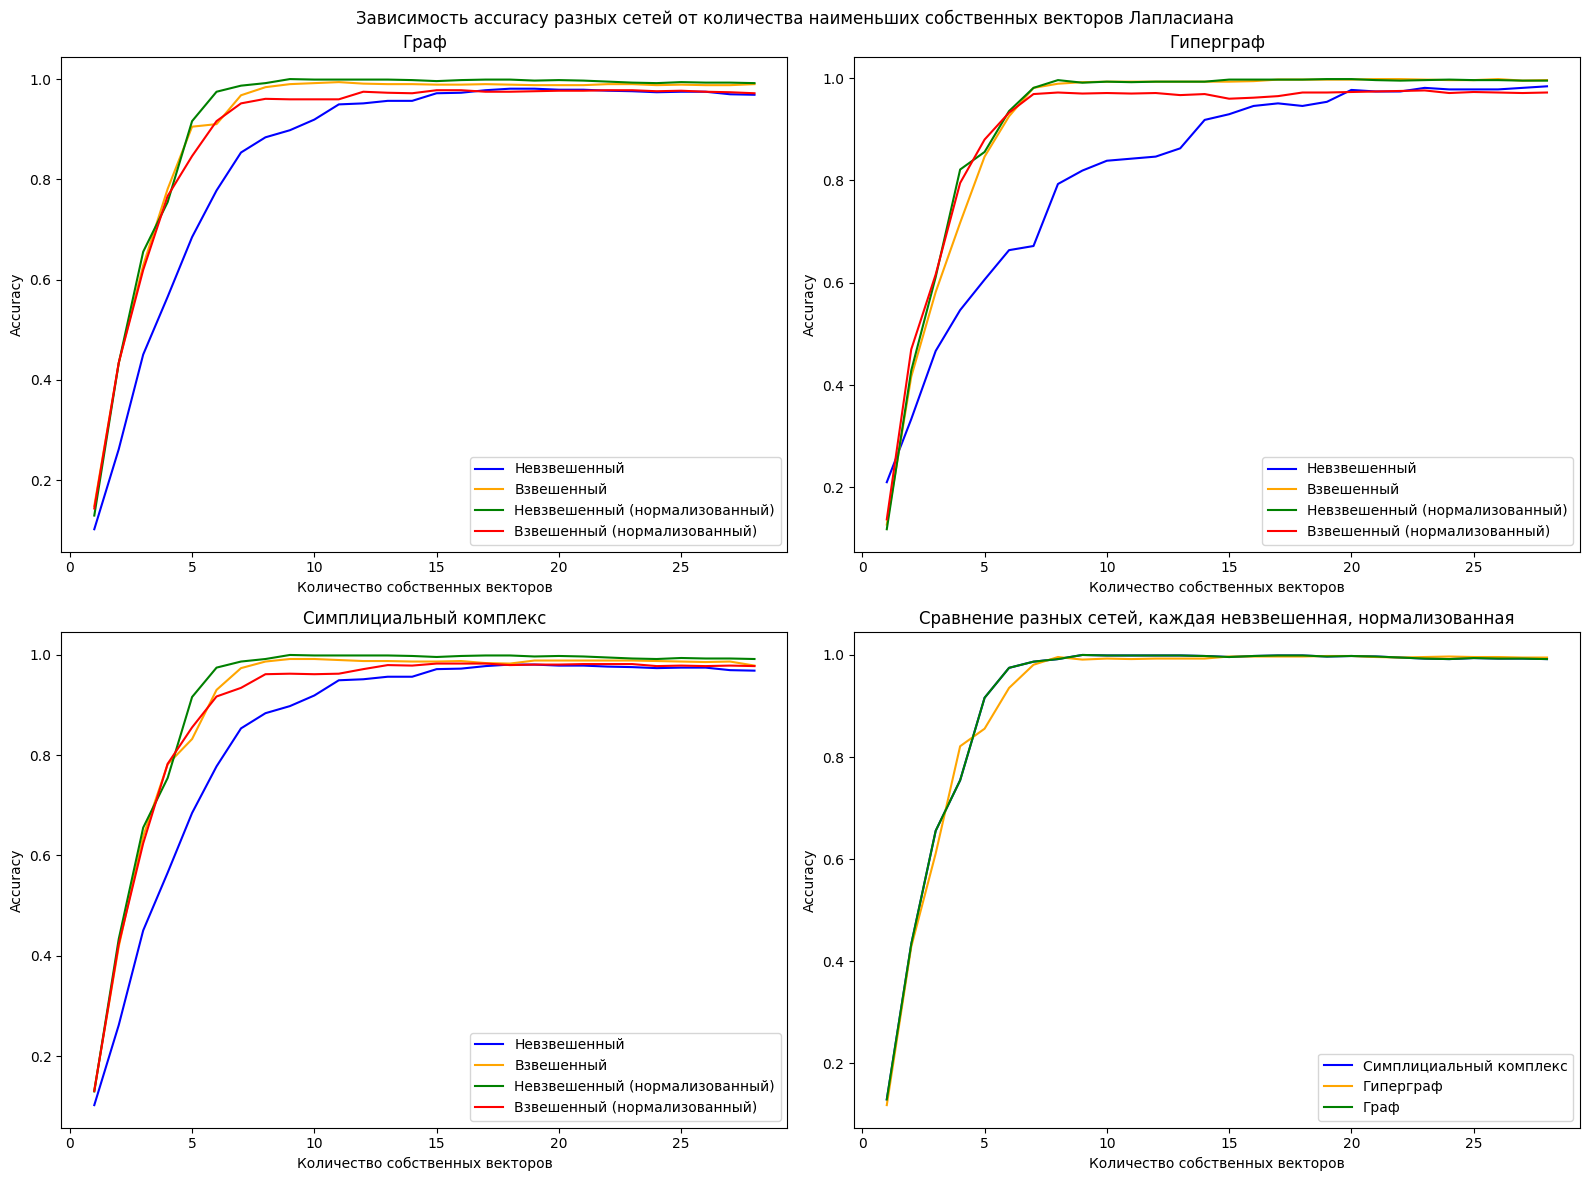

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle(
    "Зависимость accuracy разных сетей от количества наименьших собственных векторов Лапласиана"
)
iterations = [i for i in range(1, num_eig + 1)]

# Graph
axs[0, 0].plot(iterations, results_graph_unweighted, label="Невзвешенный", color="blue")
axs[0, 0].plot(iterations, results_graph_weighted, label="Взвешенный", color="orange")
axs[0, 0].plot(
    iterations,
    results_graph_unweighted_norm,
    label="Невзвешенный (нормализованный)",
    color="green",
)
axs[0, 0].plot(
    iterations,
    results_graph_weighted_norm,
    label="Взвешенный (нормализованный)",
    color="red",
)
axs[0, 0].set_title("Граф")
axs[0, 0].set_xlabel("Количество собственных векторов")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].legend()

# Hypergraph
axs[0, 1].plot(
    iterations, results_hyper_graph_unweighted, label="Невзвешенный", color="blue"
)
axs[0, 1].plot(
    iterations, results_hyper_graph_weighted, label="Взвешенный", color="orange"
)
axs[0, 1].plot(
    iterations,
    results_hyper_graph_unweighted_norm,
    label="Невзвешенный (нормализованный)",
    color="green",
)
axs[0, 1].plot(
    iterations,
    results_hyper_graph_weighted_norm,
    label="Взвешенный (нормализованный)",
    color="red",
)
axs[0, 1].set_title("Гиперграф")
axs[0, 1].set_xlabel("Количество собственных векторов")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].legend()

# Simplicial Complex
axs[1, 0].plot(
    iterations, results_simpl_complex_unweighted, label="Невзвешенный", color="blue"
)
axs[1, 0].plot(
    iterations, results_simpl_complex_weighted, label="Взвешенный", color="orange"
)
axs[1, 0].plot(
    iterations,
    results_simpl_complex_unweighted_norm,
    label="Невзвешенный (нормализованный)",
    color="green",
)
axs[1, 0].plot(
    iterations,
    results_simpl_complex_weighted_norm,
    label="Взвешенный (нормализованный)",
    color="red",
)
axs[1, 0].set_title("Симплициальный комплекс")
axs[1, 0].set_xlabel("Количество собственных векторов")
axs[1, 0].set_ylabel("Accuracy")
axs[1, 0].legend()

# Comparison
axs[1, 1].plot(
    iterations,
    results_simpl_complex_unweighted_norm,
    label="Симплициальный комплекс",
    color="blue",
)
axs[1, 1].plot(
    iterations, results_hyper_graph_unweighted_norm, label="Гиперграф", color="orange"
)
axs[1, 1].plot(iterations, results_graph_unweighted_norm, label="Граф", color="green")
axs[1, 1].set_title("Сравнение разных сетей, каждая невзвешенная, нормализованная")
axs[1, 1].set_xlabel("Количество собственных векторов")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

## Other combinations of features

### Calculate features

In [43]:
eigenvectors = np.array(
    simpl_complex.EigenValues(0, -1, 1, False, True, num_eig, "sm")[1]
)
eigenvectors2 = np.array(
    simpl_complex.EigenValues(0, -1, 2, False, True, num_eig, "sm")[1]
)

In [44]:
clos1 = np.array(
    [value for _, value in simpl_complex.ClosenessAll(0, 1, False)]
).reshape(-1, 1)
clos2 = np.array(
    [value for _, value in simpl_complex.ClosenessAll(0, 2, False)]
).reshape(-1, 1)
clos3 = np.array(
    [value for _, value in simpl_complex.ClosenessAll(0, 3, False)]
).reshape(-1, 1)
clos4 = np.array(
    [value for _, value in simpl_complex.ClosenessAll(0, 4, False)]
).reshape(-1, 1)
centr_eig1 = np.array(
    [value for _, value in simpl_complex.EigenCentrality(0, 1, False)]
).reshape(-1, 1)
centr_sub1 = np.array(
    [value for _, value in simpl_complex.SubgraphCentrality(0, 2, False)]
).reshape(-1, 1)
centr_eig2 = np.array(
    [value for _, value in simpl_complex.EigenCentrality(0, 2, False)]
).reshape(-1, 1)
centr_sub2 = np.array(
    [value for _, value in simpl_complex.SubgraphCentrality(0, 1, False)]
).reshape(-1, 1)
betw1 = np.array(
    [value for _, value in simpl_complex.BetweennessAll(0, 1, False)]
).reshape(-1, 1)
betw2 = np.array(
    [value for _, value in simpl_complex.BetweennessAll(0, 2, False)]
).reshape(-1, 1)

In [45]:
deg1 = np.array(simpl_complex.DegreeAll(0, 1, True)).reshape(-1, 1)
deg2 = np.array(simpl_complex.DegreeAll(0, 2, True)).reshape(-1, 1)

### Laplacian2

In [46]:
for i in range(1, num_eig + 1):
    X = eigenvectors2[:, :i]
    mean_solve(X, y)

Mean accuracy: 0.09596
Mean accuracy: 0.10000
Mean accuracy: 0.10202
Mean accuracy: 0.10000
Mean accuracy: 0.09596
Mean accuracy: 0.10202
Mean accuracy: 0.10404
Mean accuracy: 0.10404
Mean accuracy: 0.10303
Mean accuracy: 0.10404
Mean accuracy: 0.23636
Mean accuracy: 0.24444
Mean accuracy: 0.32424
Mean accuracy: 0.35354
Mean accuracy: 0.44141
Mean accuracy: 0.48485
Mean accuracy: 0.51010
Mean accuracy: 0.57374
Mean accuracy: 0.58687
Mean accuracy: 0.61616
Mean accuracy: 0.62727
Mean accuracy: 0.65960
Mean accuracy: 0.70404
Mean accuracy: 0.73030
Mean accuracy: 0.74141
Mean accuracy: 0.74949
Mean accuracy: 0.74646
Mean accuracy: 0.74747


In [47]:
# Composition of Lapl1 and Lapl2
# Top smallest of first and second laplacians
for i in range(1, num_eig + 1):
    for j in range(0, num_eig + 1):
        X = eigenvectors[:, :i]
        Y = eigenvectors2[:, :j]
        X = np.hstack((X, Y))
        mean_solve(X, y)

Mean accuracy: 0.12929
Mean accuracy: 0.13939
Mean accuracy: 0.13939
Mean accuracy: 0.13636
Mean accuracy: 0.13535
Mean accuracy: 0.13636
Mean accuracy: 0.13737
Mean accuracy: 0.13535
Mean accuracy: 0.13535
Mean accuracy: 0.13535
Mean accuracy: 0.13636
Mean accuracy: 0.28384
Mean accuracy: 0.29293
Mean accuracy: 0.36667
Mean accuracy: 0.37980
Mean accuracy: 0.47071
Mean accuracy: 0.48889
Mean accuracy: 0.51515
Mean accuracy: 0.57576
Mean accuracy: 0.58283
Mean accuracy: 0.61717
Mean accuracy: 0.62121
Mean accuracy: 0.65859
Mean accuracy: 0.70000
Mean accuracy: 0.72727
Mean accuracy: 0.74848
Mean accuracy: 0.74242
Mean accuracy: 0.74444
Mean accuracy: 0.74141
Mean accuracy: 0.43333
Mean accuracy: 0.43131
Mean accuracy: 0.42525
Mean accuracy: 0.41515
Mean accuracy: 0.41818
Mean accuracy: 0.41616
Mean accuracy: 0.41414
Mean accuracy: 0.41414
Mean accuracy: 0.41414
Mean accuracy: 0.41414
Mean accuracy: 0.41616
Mean accuracy: 0.53131
Mean accuracy: 0.52626
Mean accuracy: 0.52929
Mean accura

### Combinations

In [48]:
# Get best combinations from all possibles

from itertools import product

# List of your feature names
features = [
    clos1,
    clos2,
    centr_eig1,
    centr_eig2,
    centr_sub1,
    centr_sub2,
    deg1,
    deg2,
]

feat_acc = []
for mask in product([0, 1], repeat=len(features)):
    selected = [f for f, m in zip(features, mask) if m]
    if len(selected) == 0:
        continue
    X = np.array(selected).reshape(len(selected), len(selected[0])).transpose()
    score = mean_solve(X, y, debug=False)
    feat_acc.append((score, mask))
feat_acc.sort(key=lambda x: x[0], reverse=True)

feat_acc

[(0.49393939393939396, (1, 1, 1, 1, 1, 1, 1, 1)),
 (0.49191919191919187, (1, 1, 1, 1, 1, 0, 1, 0)),
 (0.48989898989898994, (1, 1, 1, 1, 1, 1, 1, 0)),
 (0.4878787878787879, (1, 1, 1, 1, 1, 0, 1, 1)),
 (0.4828282828282828, (1, 1, 1, 1, 0, 1, 1, 0)),
 (0.48181818181818176, (1, 1, 1, 1, 0, 1, 1, 1)),
 (0.4727272727272728, (1, 1, 1, 1, 0, 0, 1, 0)),
 (0.47272727272727266, (1, 1, 1, 1, 0, 0, 1, 1)),
 (0.4707070707070707, (1, 1, 1, 1, 1, 1, 0, 1)),
 (0.4626262626262627, (0, 1, 1, 1, 1, 1, 1, 1)),
 (0.4616161616161616, (1, 1, 1, 0, 1, 1, 1, 0)),
 (0.4616161616161616, (1, 1, 1, 1, 1, 0, 0, 1)),
 (0.4606060606060606, (1, 1, 1, 0, 1, 1, 1, 1)),
 (0.45757575757575764, (1, 1, 0, 1, 1, 1, 1, 1)),
 (0.4575757575757575, (1, 1, 1, 1, 0, 1, 0, 1)),
 (0.45656565656565656, (0, 1, 1, 1, 1, 0, 1, 1)),
 (0.4555555555555556, (1, 1, 0, 1, 1, 1, 1, 0)),
 (0.45555555555555555, (0, 1, 1, 1, 1, 1, 1, 0)),
 (0.45555555555555555, (1, 1, 1, 0, 1, 0, 1, 1)),
 (0.45555555555555555, (1, 1, 1, 1, 1, 1, 0, 0)),
 (0.454545

### Solo features

In [49]:
for x in [
    clos1,
    clos2,
    betw1,
    betw2,
    centr_eig1,
    centr_eig2,
    centr_sub1,
    centr_sub2,
    deg1,
    deg2,
]:
    mean_solve(x, y)

Mean accuracy: 0.12323
Mean accuracy: 0.12929
Mean accuracy: 0.08889
Mean accuracy: 0.11414
Mean accuracy: 0.21616
Mean accuracy: 0.25152
Mean accuracy: 0.25758
Mean accuracy: 0.22222
Mean accuracy: 0.15354
Mean accuracy: 0.14949


### Combination

In [50]:
for i in range(1, num_eig + 1):
    X = eigenvectors[:, :i]
    old = mean_solve(X, y, debug=False)
    print(f"Old: {old}")

    X = np.hstack((X, clos1))
    best_score = mean_solve(X, y, debug=False)
    print(f"New: {best_score}")
    print(f"profit: {((best_score - old))*100:.2f}")
    # print(f"Old: {old} vs new: {new}")

Old: 0.1292929292929293
New: 0.1606060606060606
profit: 3.13
Old: 0.4333333333333333
New: 0.404040404040404
profit: -2.93
Old: 0.6555555555555556
New: 0.6181818181818183
profit: -3.74
Old: 0.7545454545454545
New: 0.7252525252525253
profit: -2.93
Old: 0.9161616161616163
New: 0.898989898989899
profit: -1.72
Old: 0.9747474747474747
New: 0.9727272727272729
profit: -0.20
Old: 0.9868686868686869
New: 0.9838383838383837
profit: -0.30
Old: 0.9919191919191919
New: 0.9868686868686869
profit: -0.51
Old: 1.0
New: 1.0
profit: 0.00
Old: 0.998989898989899
New: 0.998989898989899
profit: 0.00
Old: 0.998989898989899
New: 0.998989898989899
profit: 0.00
Old: 0.998989898989899
New: 0.998989898989899
profit: 0.00
Old: 0.998989898989899
New: 0.998989898989899
profit: 0.00
Old: 0.997979797979798
New: 0.9969696969696968
profit: -0.10
Old: 0.995959595959596
New: 0.995959595959596
profit: 0.00
Old: 0.997979797979798
New: 0.997979797979798
profit: 0.00
Old: 0.998989898989899
New: 0.998989898989899
profit: 0.00
Ol

In [51]:
for i in range(1, num_eig + 1):
    X = eigenvectors[:, :i]
    old = mean_solve(X, y, debug=False)
    print(f"Old: {old}")

    X = np.hstack((X, clos1, clos2, centr_eig1, centr_eig2, centr_sub1, centr_sub2))
    best_score = mean_solve(X, y, debug=False)
    print(f"New: {best_score}")
    print(f"profit: {((best_score - old))*100:.2f}")
    # print(f"Old: {old} vs new: {new}")

Old: 0.1292929292929293
New: 0.5444444444444445
profit: 41.52
Old: 0.4333333333333333
New: 0.6757575757575757
profit: 24.24
Old: 0.6555555555555556
New: 0.7717171717171716
profit: 11.62
Old: 0.7545454545454545
New: 0.8262626262626263
profit: 7.17
Old: 0.9161616161616163
New: 0.904040404040404
profit: -1.21
Old: 0.9747474747474747
New: 0.9686868686868687
profit: -0.61
Old: 0.9868686868686869
New: 0.9767676767676766
profit: -1.01
Old: 0.9919191919191919
New: 0.9777777777777776
profit: -1.41
Old: 1.0
New: 0.990909090909091
profit: -0.91
Old: 0.998989898989899
New: 0.98989898989899
profit: -0.91
Old: 0.998989898989899
New: 0.9898989898989898
profit: -0.91
Old: 0.998989898989899
New: 0.9919191919191919
profit: -0.71
Old: 0.998989898989899
New: 0.9919191919191919
profit: -0.71
Old: 0.997979797979798
New: 0.990909090909091
profit: -0.71
Old: 0.995959595959596
New: 0.9919191919191921
profit: -0.40
Old: 0.997979797979798
New: 0.9919191919191919
profit: -0.61
Old: 0.998989898989899
New: 0.991919

## Hodge decomposition on edges

In [52]:
eigenvectors = np.array(
    simpl_complex.EigenValues(1, 0, 2, False, True, num_eig, "sm")[1]
)

In [53]:
edges = simpl_complex.GetSimplicesWithDimension(1)
assert len(edges) == len(eigenvectors[:, 0])

In [54]:
eigenvectors.shape

(5818, 28)

In [55]:
edge_high = []
edge_decompose_high = []

# edge_prime = []
# edge_decompose_prime = []

In [56]:
from aggregator import Aggregator

aggr = Aggregator(V=V)

In [57]:
edges[:10]

[[0, 1],
 [0, 21],
 [0, 24],
 [0, 25],
 [0, 26],
 [0, 70],
 [0, 73],
 [0, 74],
 [0, 79],
 [0, 80]]

In [58]:
for i in range(1, 1 + eigenvectors.shape[1]):
    X = aggr.push_down(eigenvectors[:, :i], edges)
    edge_high.append(mean_solve(X, y))
    # edge_prime.append(mean_solve(X, y))

Mean accuracy: 0.10303
Mean accuracy: 0.09192
Mean accuracy: 0.08990
Mean accuracy: 0.09798
Mean accuracy: 0.10505
Mean accuracy: 0.11717
Mean accuracy: 0.12222
Mean accuracy: 0.11818
Mean accuracy: 0.13131
Mean accuracy: 0.13939
Mean accuracy: 0.15051
Mean accuracy: 0.15960
Mean accuracy: 0.15657
Mean accuracy: 0.16061
Mean accuracy: 0.16566
Mean accuracy: 0.17576
Mean accuracy: 0.17879
Mean accuracy: 0.18485
Mean accuracy: 0.19394
Mean accuracy: 0.20101
Mean accuracy: 0.20404
Mean accuracy: 0.21212
Mean accuracy: 0.20909
Mean accuracy: 0.21212
Mean accuracy: 0.21818
Mean accuracy: 0.22424
Mean accuracy: 0.24141
Mean accuracy: 0.24747


In [59]:
eig_decomposition = np.zeros((eigenvectors.shape[0], 0))
for i in range(eigenvectors.shape[1]):
    c1, c2, c3 = simpl_complex.HodgeDecomposition(1, 0, 2, list(eigenvectors[:, i]))

    c1 = np.array(c1).reshape(-1, 1)
    c2 = np.array(c2).reshape(-1, 1)
    c3 = np.array(c3).reshape(-1, 1)

    to_add = []
    for c in [c1, c2, c3]:
        if np.isfinite(c).all() and not np.all(c == c[0]):
            to_add.append(c)
        else:
            print("skip")

    # to_add = [eigenvectors[:, i].reshape(-1, 1)]
    if len(to_add) > 0:
        eig_decomposition = np.hstack((eig_decomposition, *to_add))

    X = aggr.push_down(eig_decomposition, edges)
    edge_decompose_high.append(mean_solve(X, y))
    # edge_decompose_prime.append(mean_solve(X, y))

Mean accuracy: 0.13333
Mean accuracy: 0.16970
Mean accuracy: 0.20202
Mean accuracy: 0.20909
Mean accuracy: 0.20303
Mean accuracy: 0.19798
Mean accuracy: 0.21616
Mean accuracy: 0.22323
Mean accuracy: 0.23030
Mean accuracy: 0.24545
Mean accuracy: 0.26162
Mean accuracy: 0.26768
Mean accuracy: 0.26970
Mean accuracy: 0.26970
Mean accuracy: 0.27273
Mean accuracy: 0.26667
Mean accuracy: 0.27576
Mean accuracy: 0.28485
Mean accuracy: 0.30303
Mean accuracy: 0.29596
Mean accuracy: 0.29394
Mean accuracy: 0.29899
Mean accuracy: 0.30707
Mean accuracy: 0.31717
Mean accuracy: 0.33434
Mean accuracy: 0.35859
Mean accuracy: 0.35152
Mean accuracy: 0.36061


In [60]:
# x1 = [i for i in range(1, len(edge_high) + 1)]
# x2 = [i for i in range(1, len(edge_prime) + 1)]


# fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# fig.suptitle("Зависимость accuracy от количества собственных векторов в L1 лапласиане")

# axs[0].plot(x1, edge_high, label="Без разложения Ходжа", color="blue")
# axs[0].plot(x1, edge_decompose_high, label="C разложениeм Ходжа", color="red")
# axs[0].set_title("Старшая школа")
# axs[0].set_xlabel("Количество собственных векторов")
# axs[0].set_ylabel("Accuracy")
# axs[0].legend()

# axs[1].plot(x2, edge_prime, label="Без разложения Ходжа", color="blue")
# axs[1].plot(x2, edge_decompose_prime, label="C разложениeм Ходжа", color="red")
# axs[1].set_title("Младшая школа")
# axs[1].set_xlabel("Количество собственных векторов")
# axs[1].set_ylabel("Accuracy")
# axs[1].legend()

# plt.tight_layout()
# plt.show()

<!-- eigenvectors = np.array(graph.EigenValues(0, -1, 1, False, True, num_eig, "sm")[1])
eigenvectors.shape
eig_decomposition = np.zeros((eigenvectors.shape[0], 0))
for i in range(eigenvectors.shape[1]):
    c1, c2, c3 = graph.HodgeDecomposition(0, -1, 1, list(eigenvectors[:, i]))

    c1 = np.array(c1).reshape(-1, 1)
    c2 = np.array(c2).reshape(-1, 1)
    c3 = np.array(c3).reshape(-1, 1)

    to_add = []
    for c in [c1, c2, c3]:
        if np.isfinite(c).all() and not np.all(c == c[0]):
            to_add.append(c)
        else:
            print("skip")

    if len(to_add) > 0:
        eig_decomposition = np.hstack((eig_decomposition, *to_add))
    X = np.asarray(eig_decomposition)
    mean_solve(X, y) -->